# Parameterize the kinetic rates of the model

## Conduct a simulation

In [1]:
# define the environment path 
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())
    
import warnings
warnings.filterwarnings(action='once')

from pandas import set_option
set_option("display.max_rows", None)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C

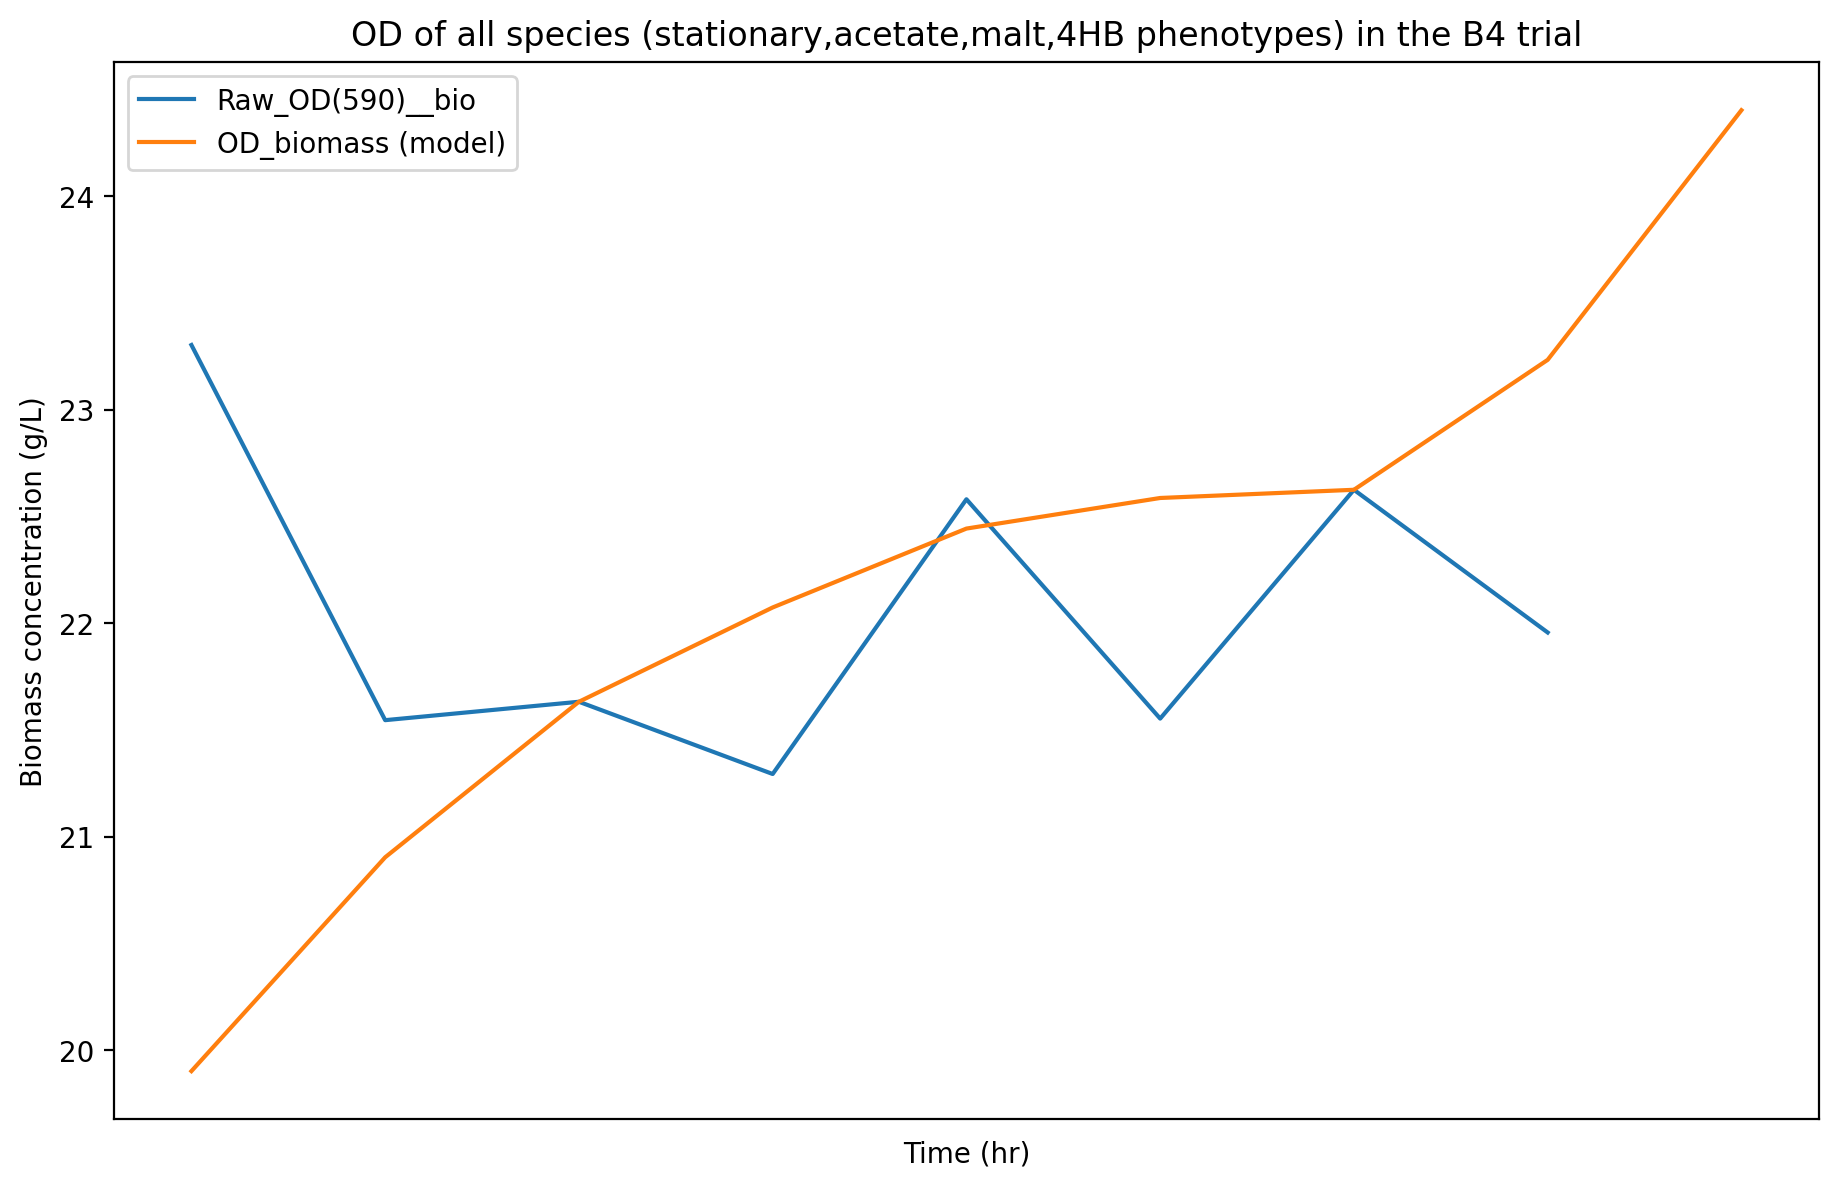

In [2]:
from datetime import datetime
from time import process_time
from pandas import set_option
set_option("display.max_rows", None)
# import the KBase objects
graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

%run MSCommFitting.py
time1 = process_time()
mscommfit = MSCommFitting()
mscommfit.load_data(#phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    community_members = {
                        kbase_api.get_from_ws("iML1515",76994): {
                            'name': 'ecoli', 
                            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                            }
                        },
                        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
                            'name': 'pf',
                            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                            }
                        }
                    },
                    base_media = kbase_api.get_from_ws("93465/19/1"),
                    signal_csv_paths = {'path':'data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = list(range(11,167)),
                    # zip_path='mscomfit.zip'
                   )
time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')
mscommfit.define_problem(parameters={
                                    'v':.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # export_zip_name='for_michaelis_menten.zip', 
                         final_rel_c12_conc = 0.1, 
                         bad_data_timesteps = {"*":"10:"},
                         mets_to_track = ["cpd00179","cpd00029","cpd00136"],
                         zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

## Change the parameters

### crude, universal, Vmax

Done loading the JSON: 0.0010416666666666667 min
initial_concentrations 0
initial_concentrations 0
initial_concentrations 5


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'mscommfitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done exporting the model: 0.019791666666666666 min
Done loading the model: 0.09010416666666667 min
graph_0
{'content': 'OD',
 'experimental_data': True,
 'phenotype': {'malt', '4HB', 'stationary', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
experimental_data


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'primal_values.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


CPU times: total: 297 ms
Wall time: 344 ms
2022-09-21 20:40:15.071594
growth Vmax: 0.1 objective value: 20809.069341316244 




Done loading the JSON: 0.0010416666666666667 min
initial_concentrations 0
initial_concentrations 0
initial_concentrations 5
Done exporting the model: 0.019791666666666666 min
Done loading the model: 0.0859375 min
graph_0
{'content': 'OD',
 'experimental_data': True,
 'phenotype': {'malt', '4HB', 'stationary', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
experimental_data
CPU times: total: 406 ms
Wall time: 431 ms
2022-09-21 20:40:21.957557
growth Vmax: 0.13333333333333336 objective value: 10654.35273284174 






C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\zipfile.py:1514: UserWarning: Duplicate name: 'B4_all species_malt,4HB,stationary,acetate phenotypes_OD.jpg'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Done loading the JSON: 0.0018229166666666667 min
initial_concentrations 0
initial_concentrations 0
initial_concentrations 5
Done exporting the model: 0.0203125 min
Done loading the model: 0.08828125 min
graph_0
{'content': 'OD',
 'experimental_data': True,
 'phenotype': {'malt', '4HB', 'stationary', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
experimental_data
CPU times: total: 422 ms
Wall time: 445 ms
2022-09-21 20:40:29.042554
growth Vmax: 0.16666666666666669 objective value: 5543.02349223636 




Done loading the JSON: 0.0010416666666666667 min
initial_concentrations 0
initial_concentrations 0
initial_concentrations 5
Done exporting the model: 0.0203125 min
Done loading the model: 0.09166666666666666 min
graph_0
{'content': 'OD',
 'experimental_data': True,
 'phenotype': {'malt', '4HB', 'stationary', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'B4'}
experimental_data
CPU times: total: 516 ms
Wall time: 550 ms
2022-09-21 20:40:36.498495
growth Vmax: 0.

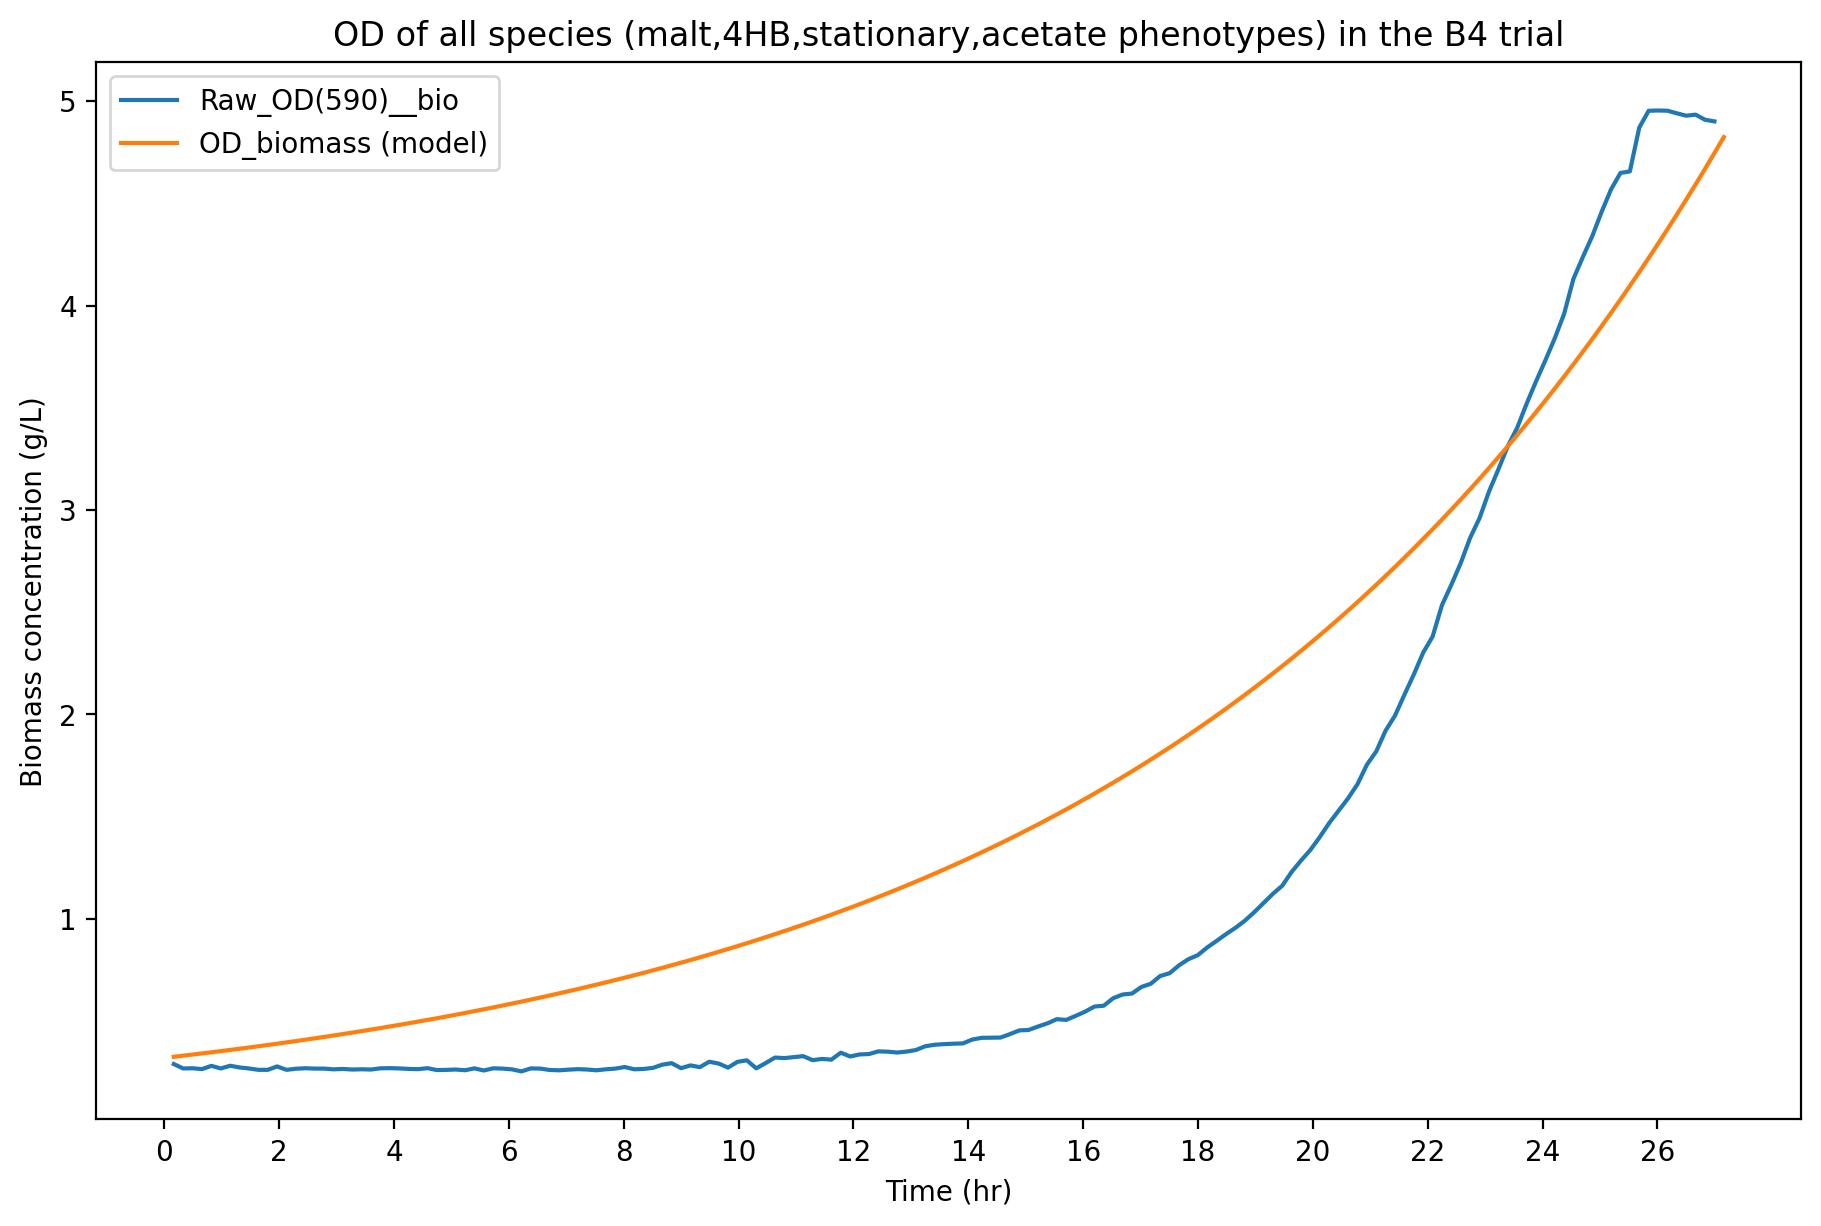

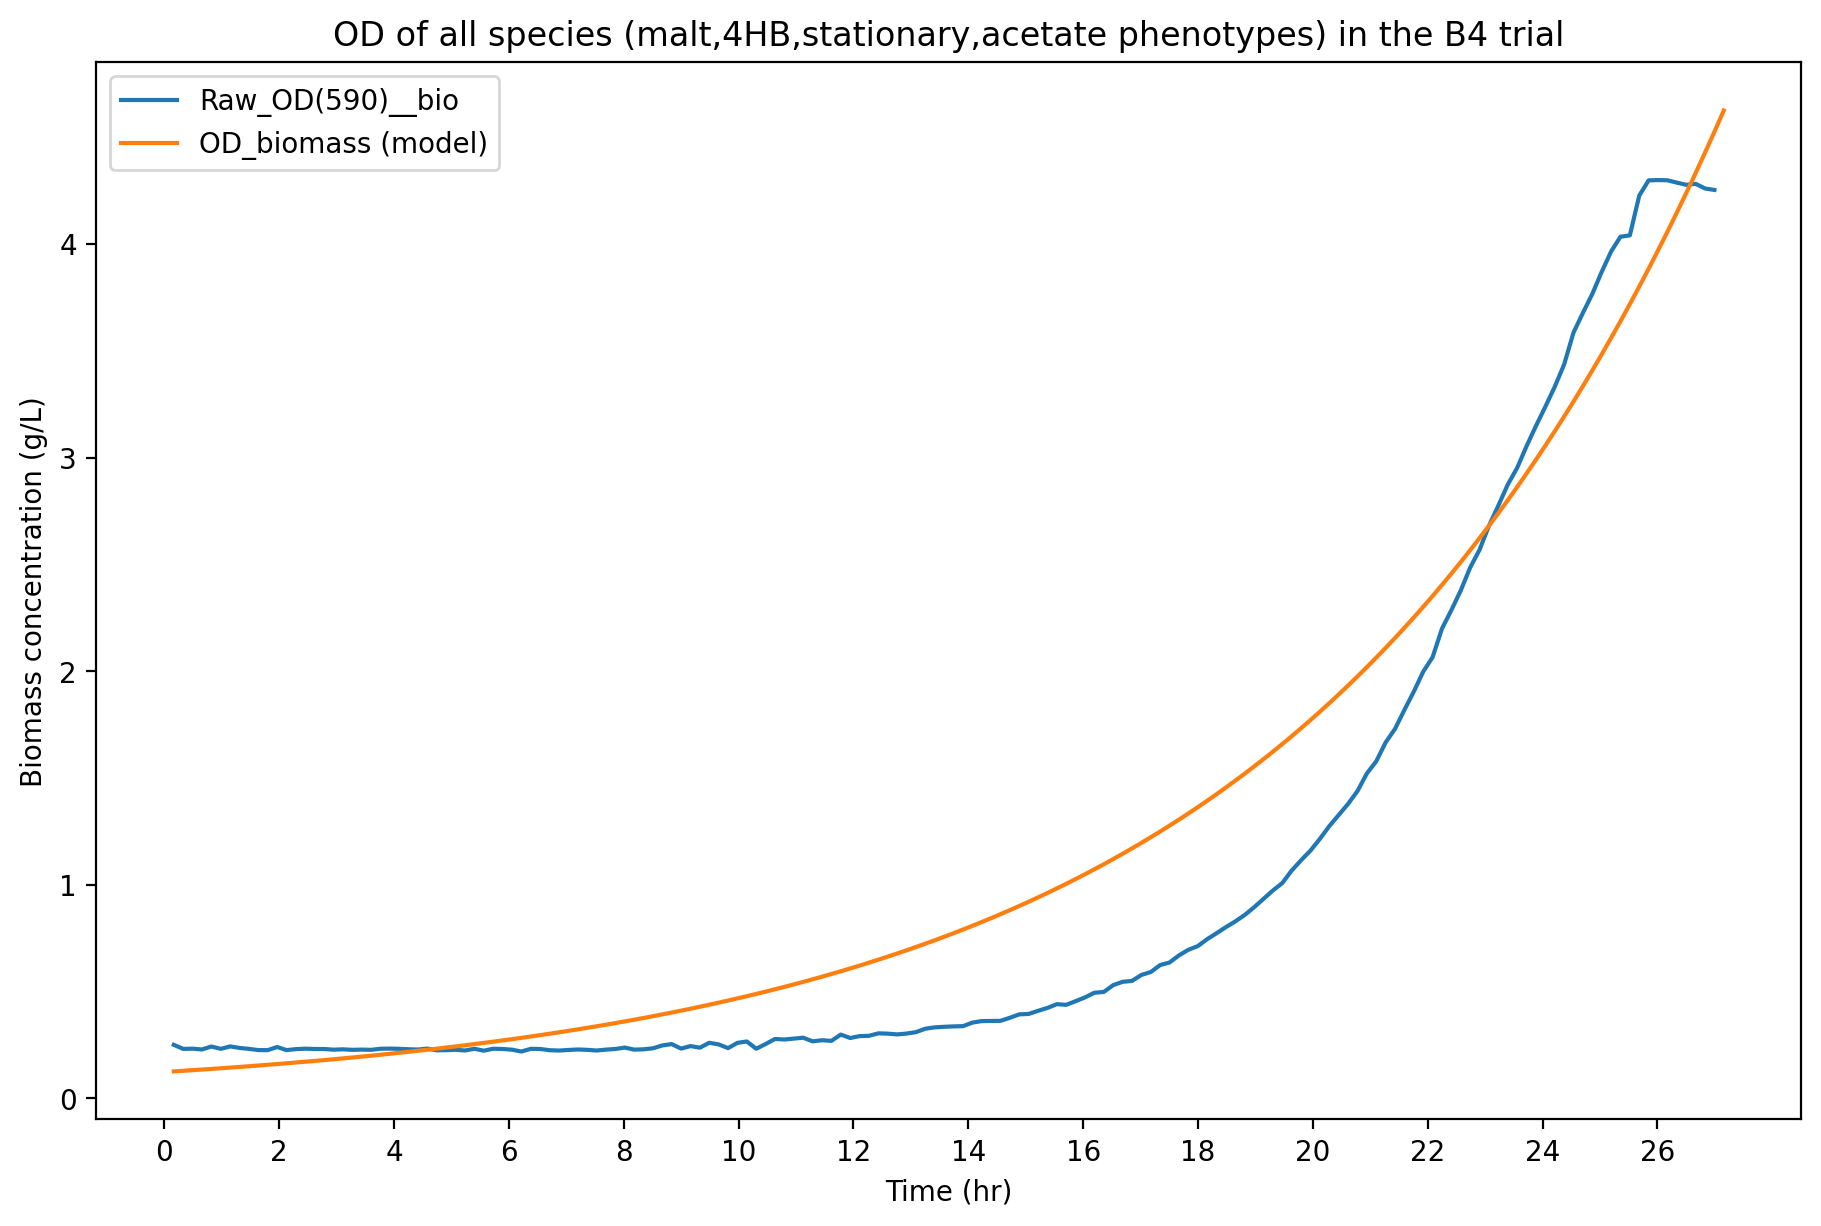

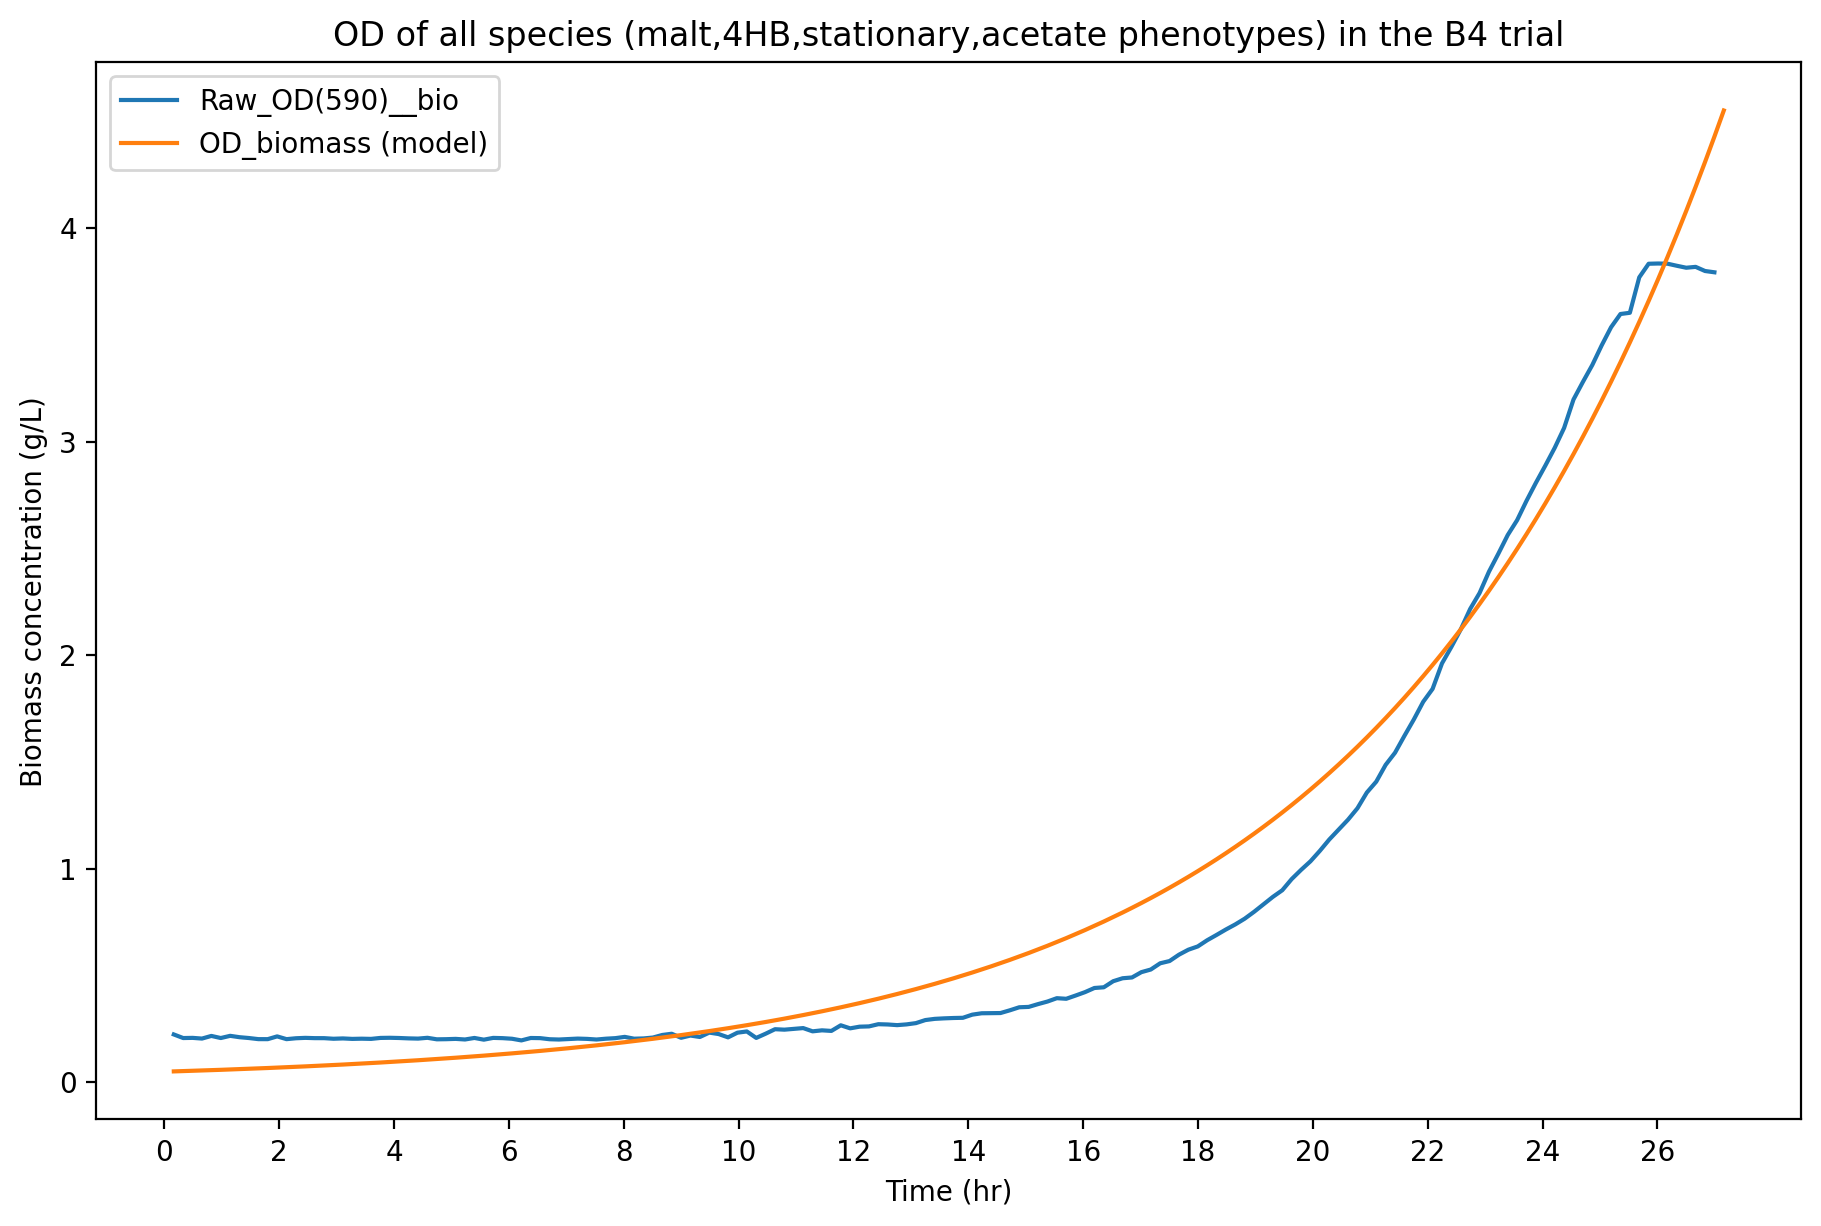

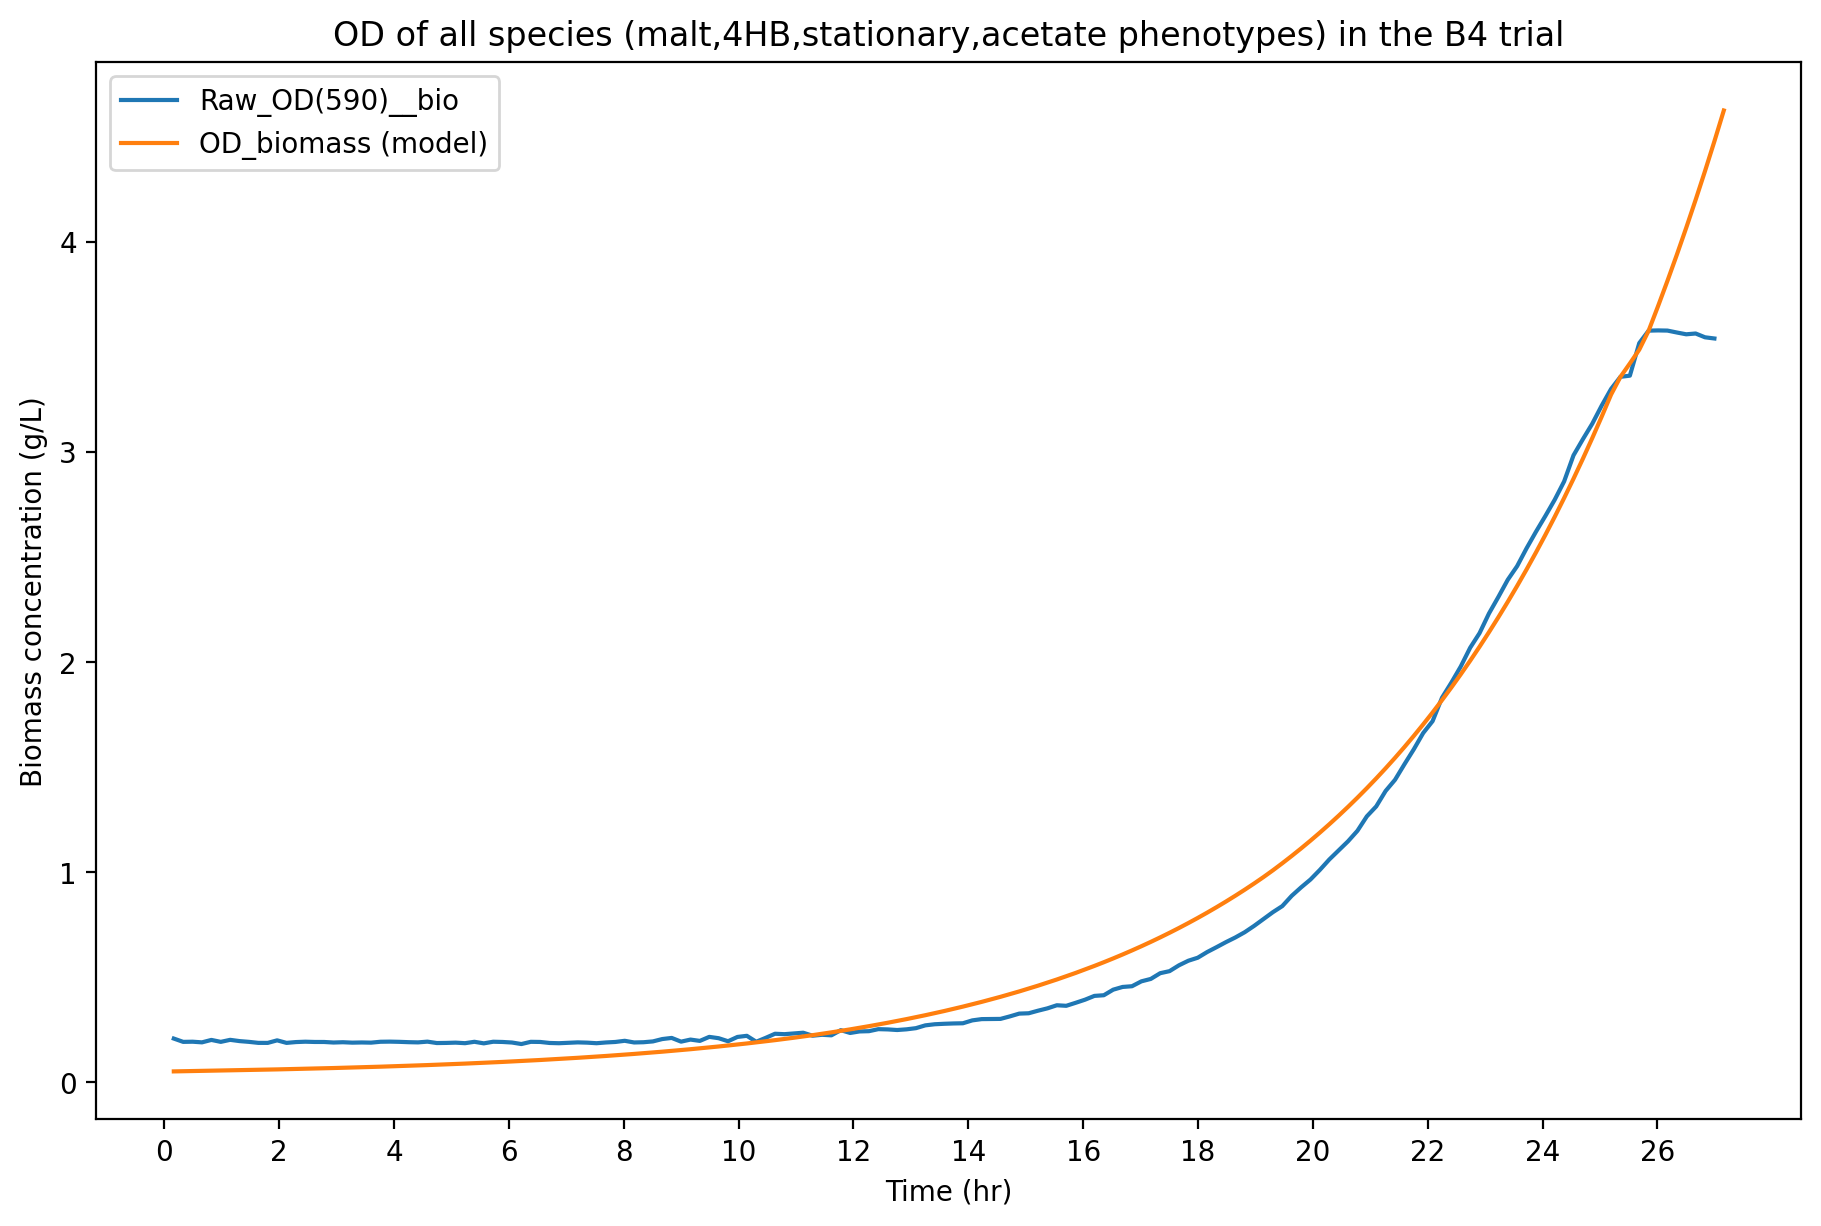

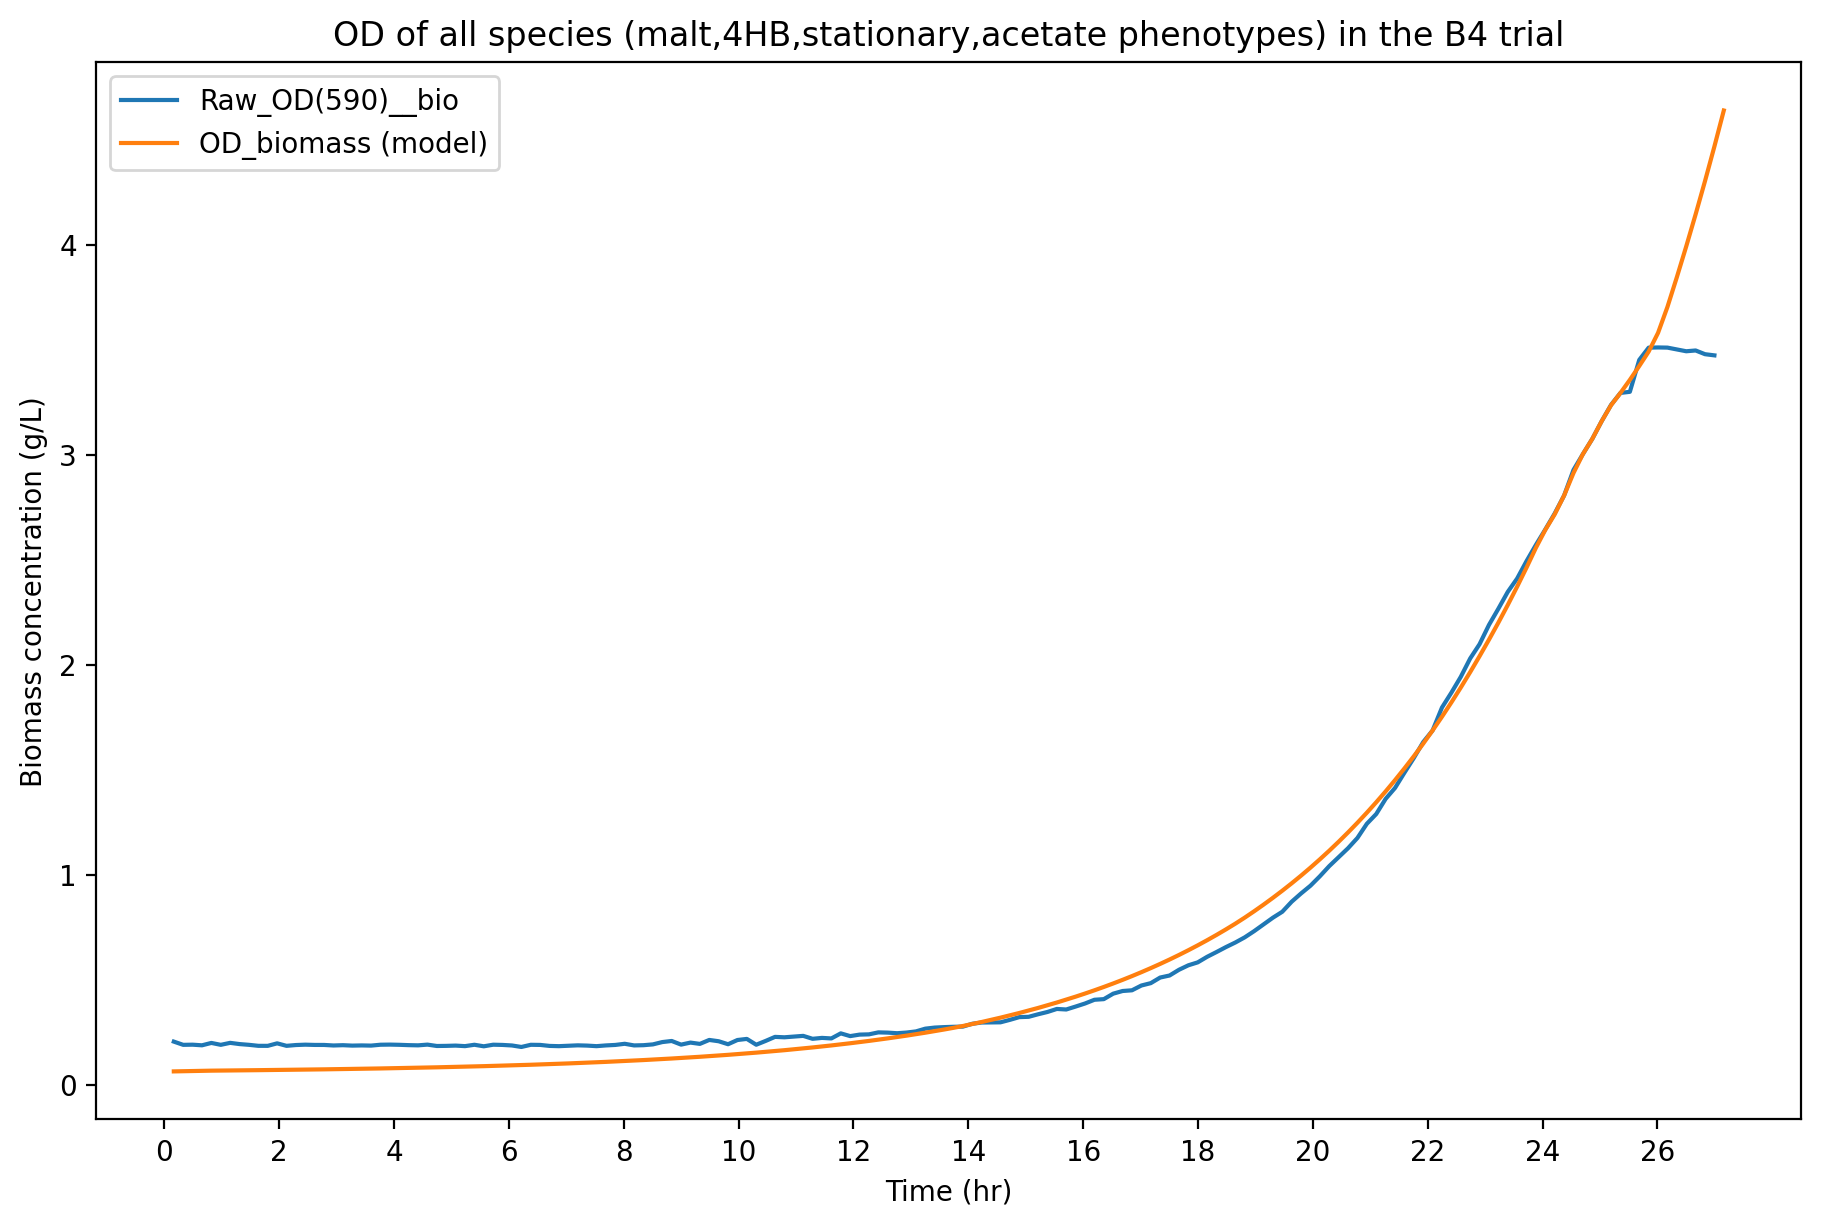

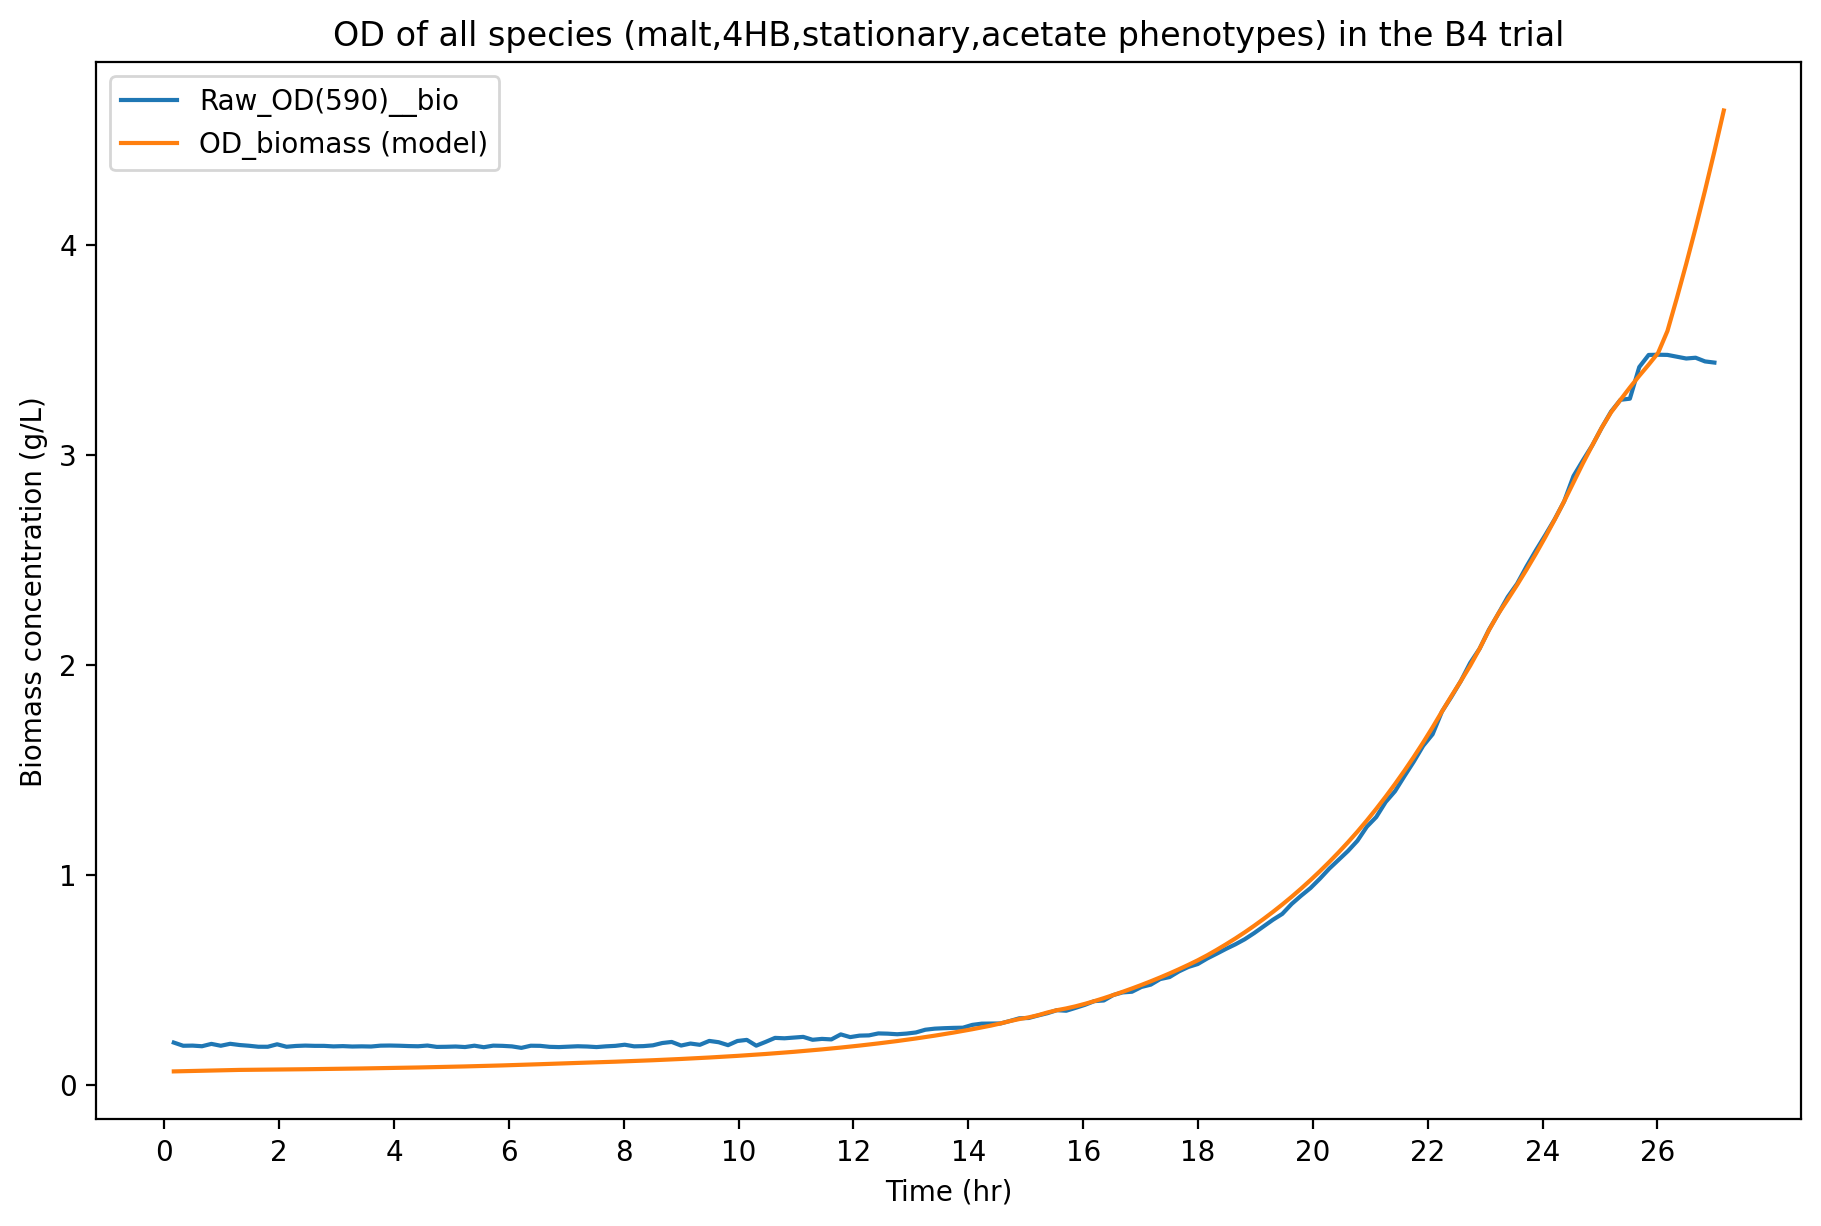

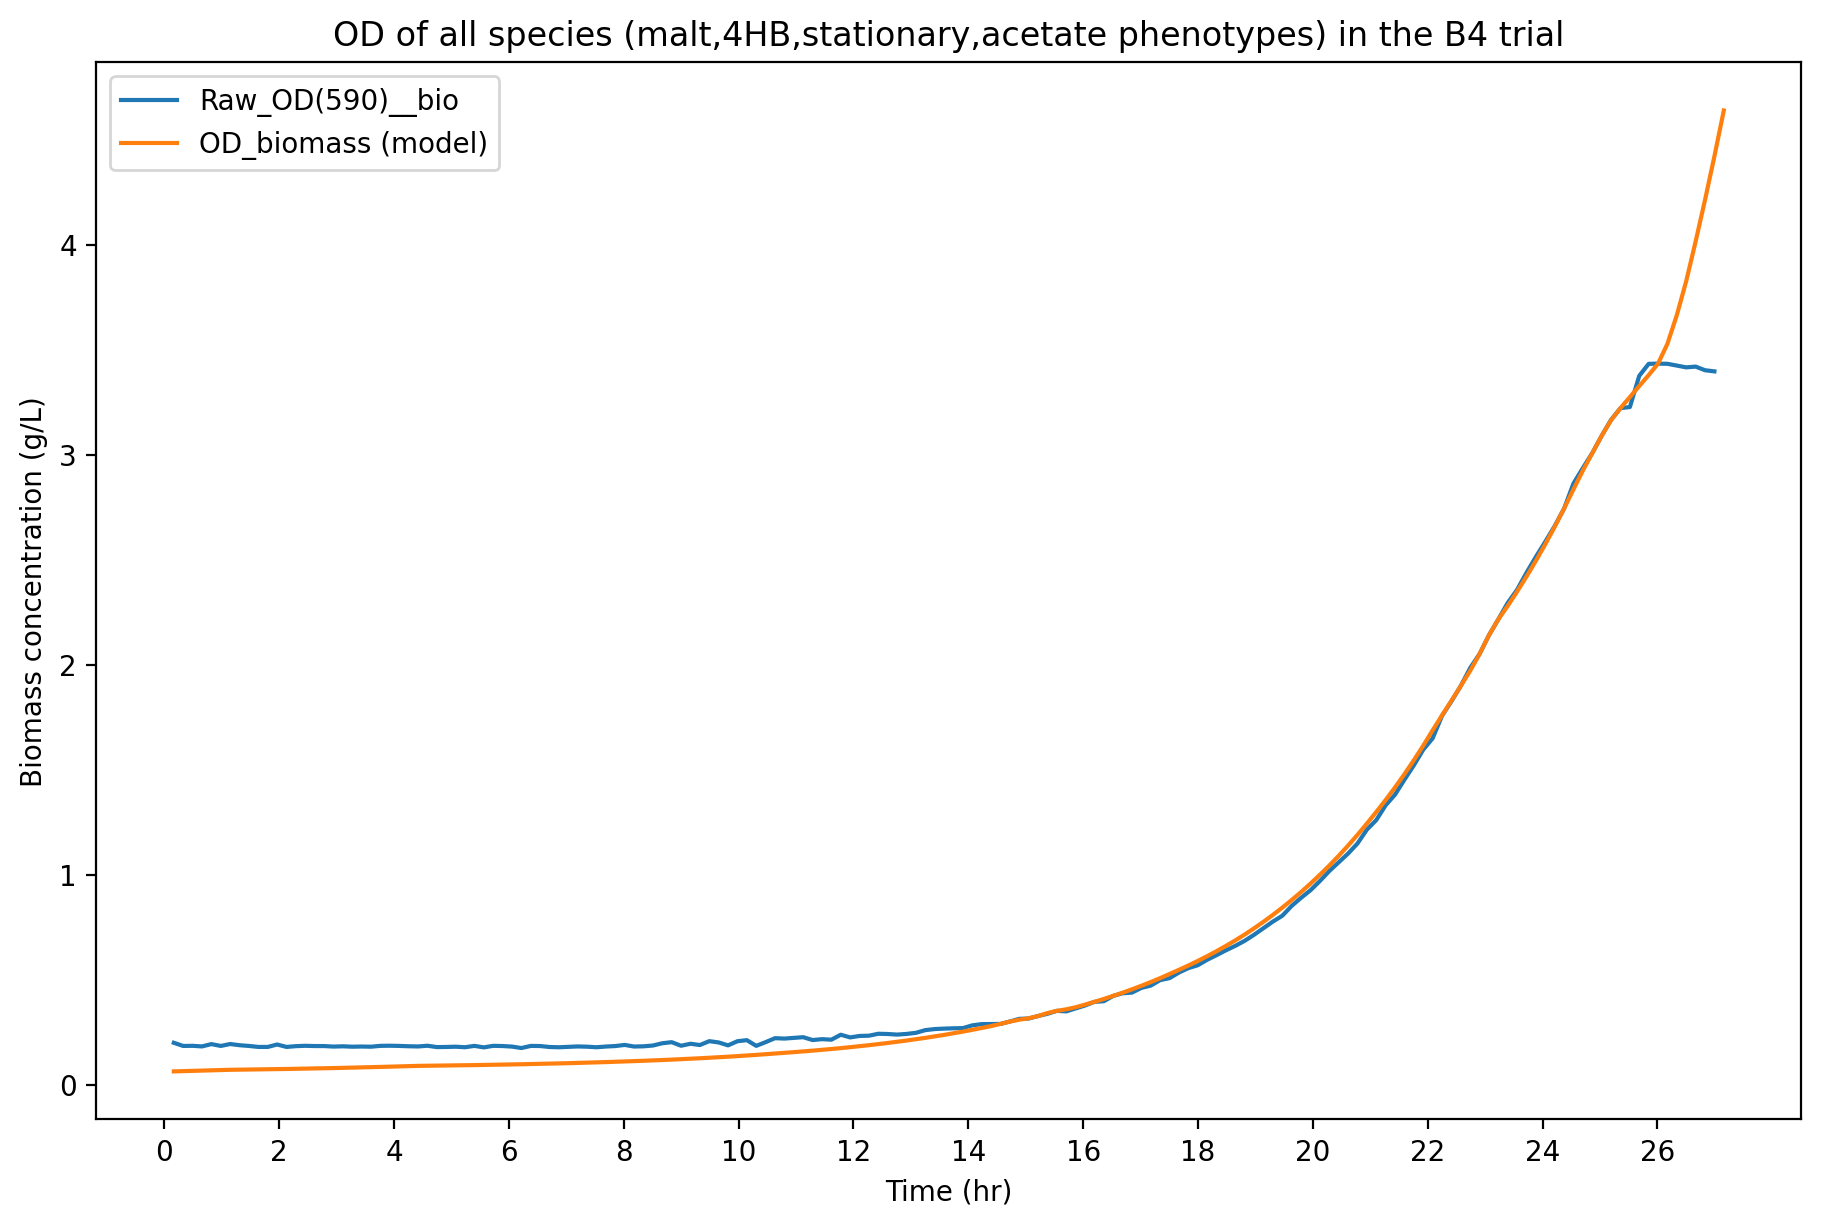

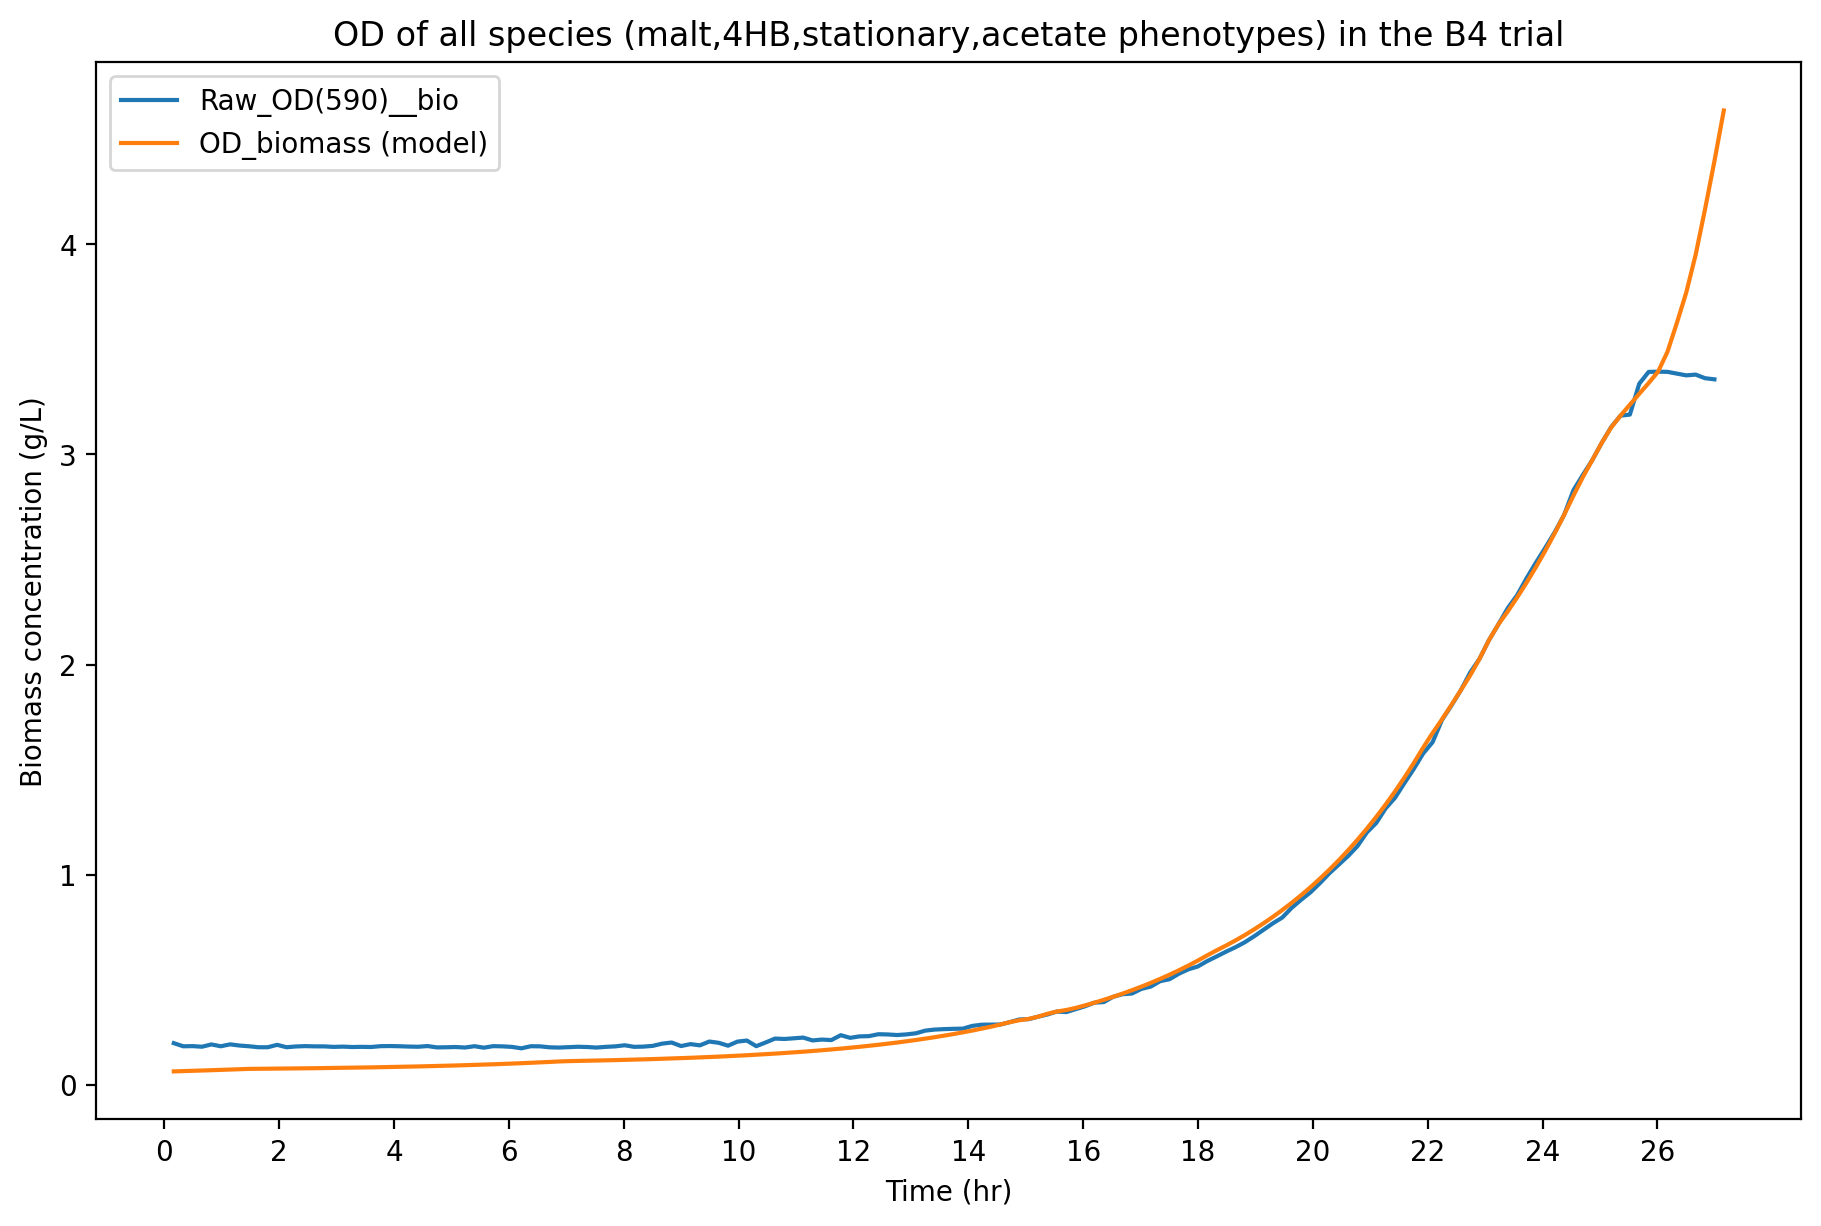

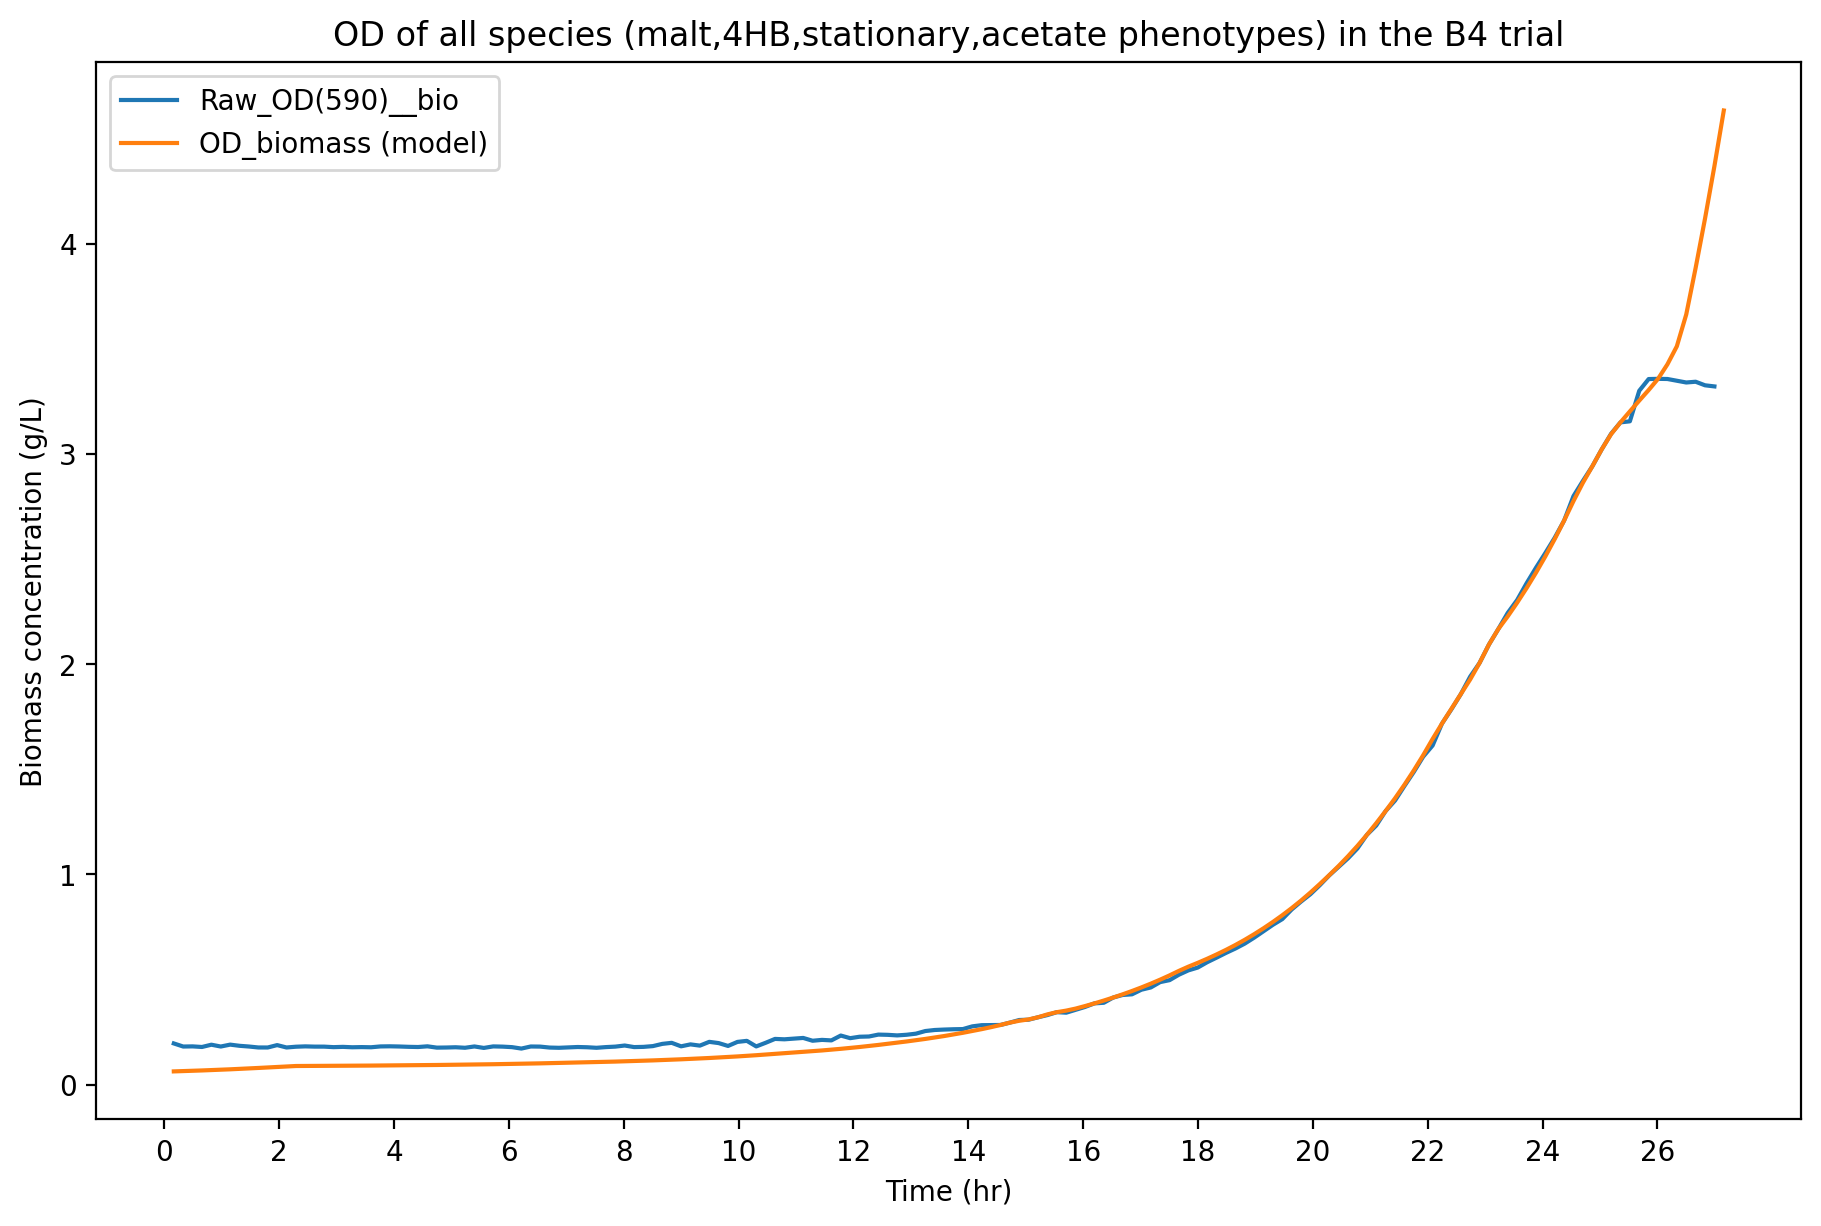

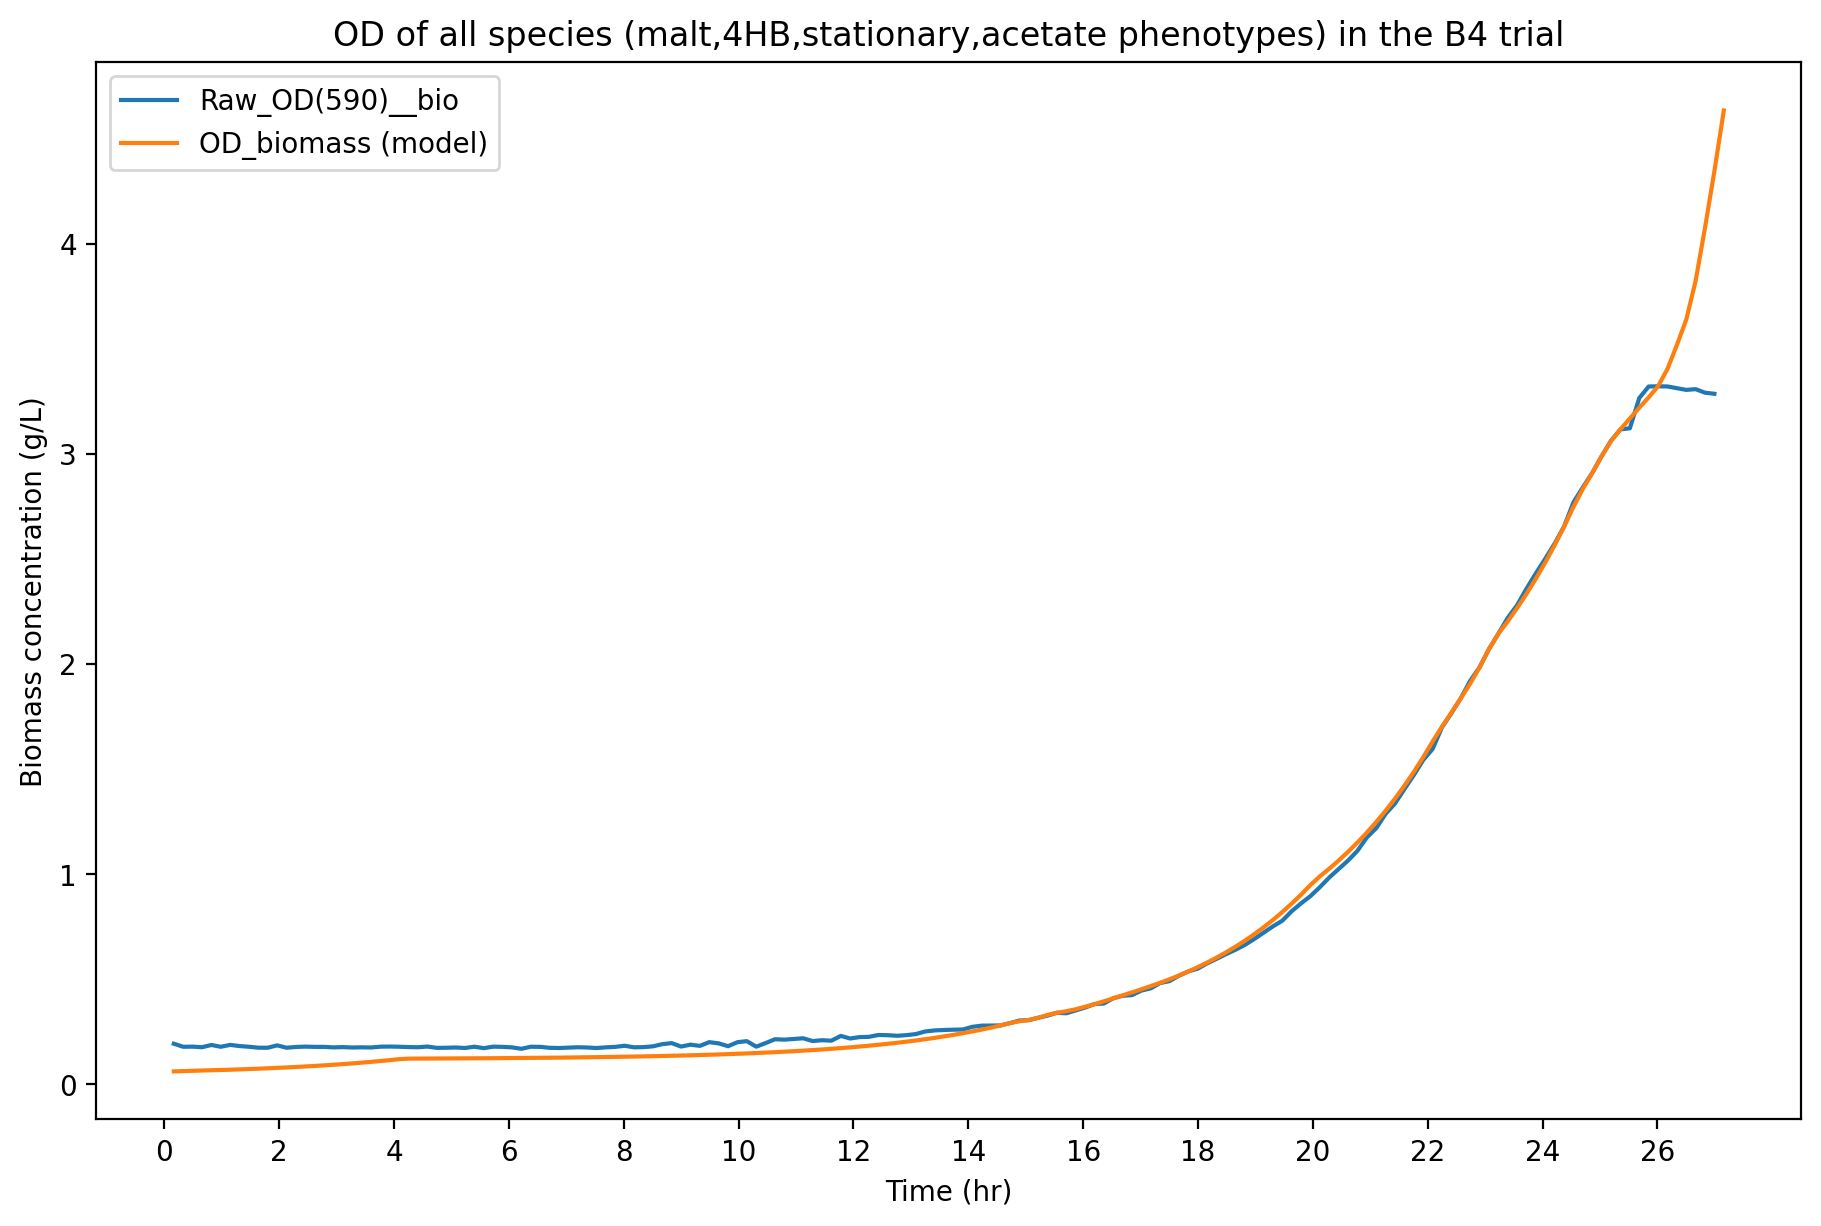

In [3]:
from itertools import chain
from numpy import linspace

interesting_metabolites = list(chain(*mscommfit.phenotype_met.values()))

for vmax in linspace(.1,.4,10):
    mscommfit.change_parameters(vmax={met:-vmax for met in interesting_metabolites}, export_zip_name='michaelis_menten_edited.zip', extract_zip_name='for_michaelis_menten.zip')
    %time mscommfit.compute(graphs, 'michaelis_menten_edited.zip')
    print(datetime.today())
    print('growth Vmax:', vmax, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

### specified trial-time dependent Vmax

In [4]:
from numpy import linspace

vmax_values = {}
km_values = {}
for var, content in mscommfit.variables.items():
    if isinstance(var, dict):
        for time in content.keys():
            vmax_values[time] = {trial:2.2667 for trial in content2}
            km_values[time] = {trial:2 for trial in content2}

mscommfit.change_parameters(vmax=vmax_values, km=km_values, strain='ecoli_malt', graphs=graphs, export_zip_name='simple_full_community_edited.zip', extract_zip_name='simple_full_community.zip')
%time mscommfit.compute(graphs, 'michaelis_menten_edited.zip')
print(datetime.today())
print('growth Vmax:', vmax, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

TypeError: change_parameters() got an unexpected keyword argument 'strain'

### Km variability with a constant Vmax

In [3]:
from itertools import chain
from numpy import linspace

interesting_metabolites = list(chain(*mscommfit.phenotype_met.values()))
# Vmax=0.42 & Km=2 to start, given [maltose]=5, which yields 0.3
vmax = 0.42
for km in linspace(1.5,2.5,10):
    mscommfit.change_parameters(vmax={met:vmax for met in interesting_metabolites}, km={met:km for met in interesting_metabolites}, export_zip_name='michaelis_menten_edited.zip', extract_zip_name='for_michaelis_menten.zip')
    %time mscommfit.compute(graphs, 'michaelis_menten_edited.zip')
    print(datetime.today())
    print('growth Vmax:', vmax, 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

Done loading the JSON: 0.0010416666666666667 min
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new concentration 0.0
new growth rate:  -0.0
new co

FeasibilityError: The solution is sub-optimal, with a infeasible status.

In [7]:
base_media = kbase_api.get_from_ws("93465/19/1")
print(dir(base_media), base_media.path)

['__VERSION__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_from_json', '_to_json', '_to_object', 'copied', 'copy_source_inaccessible', 'created', 'creator', 'data', 'data_keys', 'epoch', 'exclude_dict', 'get_data', 'get_kbase_args', 'get_media_constraints', 'id', 'info', 'isDefined', 'isMinimal', 'mediacompounds', 'name', 'orig_wsid', 'path', 'provenance', 'reagents', 'refs', 'source_id', 'type'] ['93465/19/1']


# First-phase optimization (alternatively solving for v and b)

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
B4 [0.06732863 0.06957443 0.0643292  0.06458657 0.06357642 0.06741764
 0.0643511  0.06755024 0.06555495 0.06435346 0.06274197 0.06271045
 0.06675158 0.06271924 0.06402547 0.06459738 0.06418501 0.06416303
 0.06329978 0.06376881 0.06309954 0.06338833 0.06310211 0.0645095
 0.0647177  0.06439218 0.06384139 0.06351988 0.0646929  0.06247629
 0.0626688  0.06311127 0.0622404  0.06446144 0.06197402 0.06454809
 0.06418197 0.0633036  0.06089426 0.06440568 0.0642097  0.06259803
 0.06218462 0.06293206 0.06353125 0.06

In [3]:
display(fluxes_df)

,ecoli_acetate,ecoli_malt,ecoli_stationary,pf_acetate,pf_4HB,pf_stationary
rxn,,,,,,
EX_4abzglu-e_e0,-8.037632e-05,-8.920000e-05,0,0.000000,0.000000,0
EX_cpd00001_e0,9.784338e-01,2.471043e-01,0,0.000000,0.000000,0
EX_cpd00007_e0,-2.230000e-05,-2.230000e-05,0,0.000000,0.000000,0
EX_cpd00009_e0,8.969563e-03,7.382983e-15,0,0.154713,0.000000,0
EX_cpd00011_e0,6.208717e-01,1.661645e-01,0,0.000000,0.000000,0
EX_cpd00013_e0,6.388050e-02,0.000000e+00,0,0.000000,0.000000,0
EX_cpd00020_e0,8.535524e-01,5.244983e-01,0,0.000000,0.000000,0
EX_cpd00029_e0,-1.000000e+00,1.981760e-02,0,-1.000000,0.000000,0
EX_cpd00030_e0,-5.929106e-05,-6.580000e-05,0,0.000000,0.000000,0


In [4]:
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        "species":["ecoli"],
        'content': 'biomass'
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial, conc):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

In [6]:
%run mscommfitting.py

commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit_kinetics(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    # abs_final_conc={"cpd00029":0.09}, # metabolomics data
     mets_to_track = ["cpd00179","cpd00029"],
       graphs = update_graphs("G3", None), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

pf_4HB 0.3 b_pf_4HB-G3-1
pf_4HB 0.3 b_pf_4HB-G3-2
pf_4HB 0.3 b_pf_4HB-G3-3
pf_4HB 0.3 b_pf_4HB-G3-4
pf_4HB 0.3 b_pf_4HB-G3-5
pf_4HB 0.3 b_pf_4HB-G3-6
pf_4HB 0.3 b_pf_4HB-G3-7
pf_4HB 0.3 b_pf_4HB-G3-8
pf_4HB 0.3 b_pf_4HB-G3-9
pf_4HB 0.3 b_pf_4HB-G3-10
pf_4HB 0.3 b_pf_4HB-G3-11
pf_4HB 0.3 b_pf_4HB-G3-12
pf_4HB 0.3 b_pf_4HB-G3-13
pf_4HB 0.3 b_pf_4HB-G3-14
pf_4HB 0.3 b_pf_4HB-G3-15
pf_4HB 0.3 b_pf_4HB-G3-16
pf_4HB 0.3 b_pf_4HB-G3-17
pf_4HB 0.3 b_pf_4HB-G3-18
pf_4HB 0.3 b_pf_4HB-G3-19
pf_4HB 0.3 b_pf_4HB-G3-20
pf_4HB 0.3 b_pf_4HB-G3-21
pf_4HB 0.3 b_pf_4HB-G3-22
pf_4HB 0.3 b_pf_4HB-G3-23
pf_4HB 0.3 b_pf_4HB-G3-24
pf_4HB 0.3 b_pf_4HB-G3-25
pf_4HB 0.3 b_pf_4HB-G3-26
pf_4HB 0.3 b_pf_4HB-G3-27
pf_4HB 0.3 b_pf_4HB-G3-28
pf_4HB 0.3 b_pf_4HB-G3-29
pf_4HB 0.3 b_pf_4HB-G3-30
pf_4HB 0.3 b_pf_4HB-G3-31
pf_4HB 0.3 b_pf_4HB-G3-32
pf_4HB 0.3 b_pf_4HB-G3-33
pf_4HB 0.3 b_pf_4HB-G3-34
pf_4HB 0.3 b_pf_4HB-G3-35
pf_4HB 0.3 b_pf_4HB-G3-36
pf_4HB 0.3 b_pf_4HB-G3-37
pf_4HB 0.3 b_pf_4HB-G3-38
pf_4HB 0.3 b_pf_4HB-G

Traceback (most recent call last):
  File "C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Andrew Freiburger\AppData\Local\Temp\ipykernel_35264\1068505368.py", line 4, in <cell line: 4>
    commfit.fit_kinetics(
  File "C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py", line 134, in fit_kinetics
    new_simulation.compute(primals_export_path=f"v_primals{count}.json")
  File "C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py", line 602, in compute
    raise FeasibilityError(f'The solution is sub-optimal, with a(n) {solution} status.')
modelseedpy.core.exceptions.FeasibilityError: The solution is sub-optimal, with a(n) infeasible status.

During handling of the above exception, another exception occurred:

Tr